#### Statistics Part 2 Assignment Practical Questions ####

1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.

In [ ]:
import numpy as np
from scipy.stats import norm

def z_test(sample, population_mean, population_std):
    """
    Performs a Z-test for comparing a sample mean to a known population mean.

    Args:
        sample: A list or numpy array of sample data.
        population_mean: The known population mean.
        population_std: The known population standard deviation.

    Returns:
        A dictionary containing the Z-statistic, p-value, and interpretation of the results.
    """

    sample_mean = np.mean(sample)
    sample_size = len(sample)
    z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    p_value = 2 * (1 - norm.cdf(abs(z_statistic))) # two-tailed test

    alpha = 0.05 # significance level

    if p_value < alpha:
        interpretation = "Reject the null hypothesis. There is statistically significant evidence that the sample mean is different from the population mean."
    else:
        interpretation = "Fail to reject the null hypothesis. There is no statistically significant evidence that the sample mean is different from the population mean."


    return {
        "Z-statistic": z_statistic,
        "p-value": p_value,
        "interpretation": interpretation
    }
# Example usage
sample_data = [170,172,175,168,171,173,176,169,174,170]
population_mean = 170
population_std_dev = 2.5

results = z_test(sample_data, population_mean, population_std_dev)
results


{'Z-statistic': 2.2768399153212475,
 'p-value': 0.022795786973538013,
 'interpretation': 'Reject the null hypothesis. There is statistically significant evidence that the sample mean is different from the population mean.'}

2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Simulate two random samples
np.random.seed(42)  # for reproducibility
sample1 = np.random.normal(loc=10, scale=2, size=50)
sample2 = np.random.normal(loc=12, scale=2, size=50)

# Perform an independent two-sample t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference between the two groups.")


T-statistic: -6.872731683285841
P-value: 5.877565294167719e-10
Reject the null hypothesis. There is a statistically significant difference between the two groups.


3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean.


In [ ]:
import numpy as np
from scipy.stats import norm

def one_sample_z_test(sample, population_mean, population_std):
    """
    Performs a one-sample Z-test.

    Args:
        sample: A list or numpy array of sample data.
        population_mean: The hypothesized population mean.
        population_std: The population standard deviation.

    Returns:
        A dictionary containing the Z-statistic, p-value, and interpretation.
    """
    sample_mean = np.mean(sample)
    sample_size = len(sample)
    z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    p_value = 2 * (1 - norm.cdf(abs(z_statistic)))  # Two-tailed test

    alpha = 0.05

    if p_value < alpha:
        interpretation = "Reject the null hypothesis. The sample mean is significantly different from the population mean."
    else:
        interpretation = "Fail to reject the null hypothesis. There is no significant difference between the sample mean and the population mean."

    return {
        "Z-statistic": z_statistic,
        "p-value": p_value,
        "interpretation": interpretation
    }

# Example usage
sample_data = [170, 172, 175, 168, 171, 173, 176, 169, 174, 170]
population_mean = 170
population_std = 2.5

results = one_sample_z_test(sample_data, population_mean, population_std)
results


{'Z-statistic': 2.2768399153212475,
 'p-value': 0.022795786973538013,
 'interpretation': 'Reject the null hypothesis. The sample mean is significantly different from the population mean.'}

4. Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

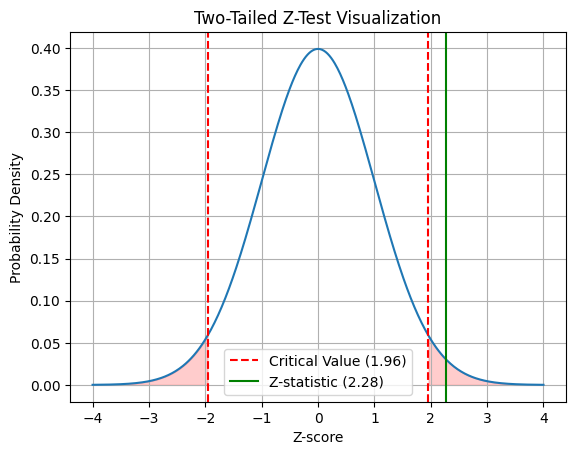

p-value: 0.023
Reject the null hypothesis.


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def two_tailed_z_test_visualization(sample, population_mean, population_std, alpha=0.05):
    sample_mean = np.mean(sample)
    sample_size = len(sample)
    z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    p_value = 2 * (1 - norm.cdf(abs(z_statistic)))

    # Visualization
    x = np.linspace(-4, 4, 500)
    y = norm.pdf(x, 0, 1)
    plt.plot(x, y)

    # Critical values
    z_critical = norm.ppf(1 - alpha / 2)
    plt.axvline(z_critical, color='red', linestyle='--', label=f'Critical Value ({z_critical:.2f})')
    plt.axvline(-z_critical, color='red', linestyle='--')

    # Observed Z-statistic
    plt.axvline(z_statistic, color='green', linestyle='-', label=f'Z-statistic ({z_statistic:.2f})')

    # Shade the rejection regions
    x_reject_right = np.linspace(z_critical, 4, 100)
    y_reject_right = norm.pdf(x_reject_right, 0, 1)
    plt.fill_between(x_reject_right, y_reject_right, 0, color='red', alpha=0.2)

    x_reject_left = np.linspace(-4, -z_critical, 100)
    y_reject_left = norm.pdf(x_reject_left, 0, 1)
    plt.fill_between(x_reject_left, y_reject_left, 0, color='red', alpha=0.2)

    plt.xlabel('Z-score')
    plt.ylabel('Probability Density')
    plt.title('Two-Tailed Z-Test Visualization')
    plt.legend()
    plt.grid(True)
    plt.show()

    if p_value < alpha:
        interpretation = "Reject the null hypothesis."
    else:
        interpretation = "Fail to reject the null hypothesis."
    print(f"p-value: {p_value:.3f}")
    print(interpretation)

# Example Usage
sample_data = [170, 172, 175, 168, 171, 173, 176, 169, 174, 170]
population_mean = 170
population_std = 2.5
two_tailed_z_test_visualization(sample_data, population_mean, population_std)


5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

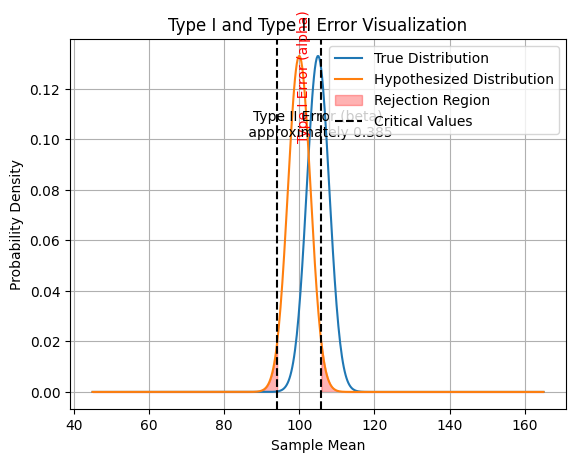

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_errors(true_mean, hypothesized_mean, std_dev, sample_size, alpha):
    """
    Calculates and visualizes Type 1 and Type 2 errors.

    Args:
      true_mean: The true population mean.
      hypothesized_mean: The mean under the null hypothesis.
      std_dev: The population standard deviation.
      sample_size: The sample size.
      alpha: The significance level (probability of Type 1 error).
    """

    # Calculate the critical values for a two-tailed test
    z_critical = norm.ppf(1 - alpha / 2)
    lower_bound = hypothesized_mean - z_critical * (std_dev / np.sqrt(sample_size))
    upper_bound = hypothesized_mean + z_critical * (std_dev / np.sqrt(sample_size))

    # Generate x-values for the distributions
    x = np.linspace(true_mean - 4 * std_dev, true_mean + 4 * std_dev, 500)


    # Plot the distributions
    plt.plot(x, norm.pdf(x, loc=true_mean, scale=std_dev / np.sqrt(sample_size)), label='True Distribution')
    plt.plot(x, norm.pdf(x, loc=hypothesized_mean, scale=std_dev / np.sqrt(sample_size)), label='Hypothesized Distribution')

    # Shade the rejection regions
    x_reject_left = np.linspace(true_mean - 4 * std_dev, lower_bound, 100)
    plt.fill_between(x_reject_left, norm.pdf(x_reject_left, loc=hypothesized_mean, scale=std_dev / np.sqrt(sample_size)), 0, color='red', alpha=0.3, label='Rejection Region')

    x_reject_right = np.linspace(upper_bound, true_mean + 4*std_dev, 100)
    plt.fill_between(x_reject_right, norm.pdf(x_reject_right, loc=hypothesized_mean, scale=std_dev / np.sqrt(sample_size)), 0, color='red', alpha=0.3)


    # Mark critical values
    plt.axvline(lower_bound, color='black', linestyle='--', label='Critical Values')
    plt.axvline(upper_bound, color='black', linestyle='--')


    # Annotate Type 1 and Type 2 errors
    plt.text(hypothesized_mean - 0.5, 0.1, 'Type I Error (alpha)', rotation=90, color='red')

    # Calculate and annotate Type II error (beta)
    beta = norm.cdf(upper_bound, loc=true_mean, scale=std_dev/np.sqrt(sample_size)) - norm.cdf(lower_bound, loc=true_mean, scale=std_dev/np.sqrt(sample_size))

    plt.text(true_mean, 0.1, f'Type II Error (beta)\n approximately {1-beta:.3f}', ha='center', va='bottom')



    plt.xlabel('Sample Mean')
    plt.ylabel('Probability Density')
    plt.title('Type I and Type II Error Visualization')
    plt.legend()
    plt.grid(True)
    plt.show()


# Example usage
visualize_errors(true_mean=105, hypothesized_mean=100, std_dev=15, sample_size=25, alpha=0.05)


6. Write a Python program to perform an independent T-test and interpret the results.

In [ ]:
from scipy.stats import ttest_ind

def independent_ttest(sample1, sample2, alpha=0.05):
    """
    Performs an independent two-sample t-test.

    Args:
        sample1: A list or numpy array of data for the first group.
        sample2: A list or numpy array of data for the second group.
        alpha: The significance level (default is 0.05).

    Returns:
        A dictionary containing the t-statistic, p-value, and interpretation.
    """

    t_statistic, p_value = ttest_ind(sample1, sample2)

    if p_value < alpha:
        interpretation = "Reject the null hypothesis. There is a statistically significant difference between the two groups."
    else:
        interpretation = "Fail to reject the null hypothesis. There is no statistically significant difference between the two groups."

    return {
        "t-statistic": t_statistic,
        "p-value": p_value,
        "interpretation": interpretation
    }

# Example usage
sample1 = [10, 12, 15, 11, 13]
sample2 = [8, 9, 10, 7, 11]

results = independent_ttest(sample1, sample2)
results


{'t-statistic': 2.8736848324283977,
 'p-value': 0.02071138748808119,
 'interpretation': 'Reject the null hypothesis. There is a statistically significant difference between the two groups.'}

7.  Perform a paired sample T-test using Python and visualize the comparison results.

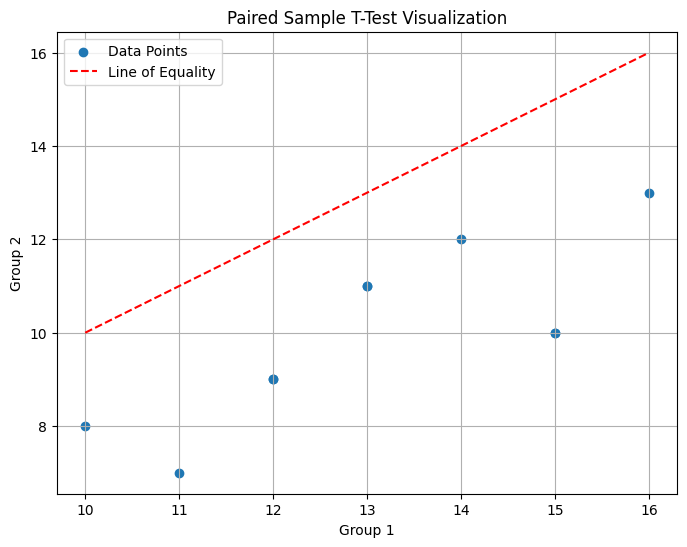

T-statistic: 8.188
P-value: 0.000
Reject the null hypothesis. There is a statistically significant difference between the two groups.


In [ ]:
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

def paired_sample_ttest(sample1, sample2, alpha=0.05):
    """
    Performs a paired sample t-test and visualizes the results.

    Args:
        sample1: A list or numpy array of data for the first group.
        sample2: A list or numpy array of data for the second group.
        alpha: The significance level (default is 0.05).
    """

    t_statistic, p_value = ttest_rel(sample1, sample2)

    if p_value < alpha:
        interpretation = "Reject the null hypothesis. There is a statistically significant difference between the two groups."
    else:
        interpretation = "Fail to reject the null hypothesis. There is no statistically significant difference between the two groups."

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(sample1, sample2, label='Data Points')
    plt.xlabel('Group 1')
    plt.ylabel('Group 2')
    plt.title('Paired Sample T-Test Visualization')
    plt.plot([min(sample1), max(sample1)], [min(sample1), max(sample1)], color='red', linestyle='--', label='Line of Equality')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"T-statistic: {t_statistic:.3f}")
    print(f"P-value: {p_value:.3f}")
    print(interpretation)


# Example Usage
sample1 = [10, 12, 15, 11, 13, 14, 16, 12, 15, 13]
sample2 = [8, 9, 10, 7, 11, 12, 13, 9, 10, 11]

paired_sample_ttest(sample1, sample2)


8. Simulate data and perform both Z-test and T-test, then compare the results using Python.

In [ ]:
import numpy as np
from scipy.stats import norm, ttest_ind, t
# Simulate data
np.random.seed(42)
population_mean = 100
population_std = 15
sample_size = 30
sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

# Z-test
z_statistic = (np.mean(sample) - population_mean) / (population_std / np.sqrt(sample_size))
p_value_z = 2 * (1 - norm.cdf(abs(z_statistic)))

# T-test
t_statistic, p_value_t = ttest_ind(sample, np.full(sample_size, population_mean))


print("Z-test:")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value_z:.4f}")

print("\nT-test:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value_t:.4f}")

print("\nComparison:")
print(f"Difference in P-values: {abs(p_value_z - p_value_t):.4f}")

#Interpret the results.  Since the sample size is sufficiently large, the results of the z-test and t-test should be very similar.


Z-test:
Z-statistic: -1.0305
P-value: 0.3028

T-test:
T-statistic: -1.1450
P-value: 0.2569

Comparison:
Difference in P-values: 0.0459


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

In [ ]:
import numpy as np
from scipy.stats import t

def confidence_interval(sample, confidence=0.95):
    """
    Calculates the confidence interval for a sample mean.

    Args:
        sample: A list or numpy array of sample data.
        confidence: The desired confidence level (default is 0.95).

    Returns:
        A tuple containing the lower and upper bounds of the confidence interval.
    """
    n = len(sample)
    mean = np.mean(sample)
    std_err = np.std(sample, ddof=1) / np.sqrt(n)  # Use ddof=1 for sample standard deviation
    t_critical = t.ppf((1 + confidence) / 2, df=n - 1)  # Degrees of freedom = n - 1
    margin_of_error = t_critical * std_err
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Example usage:
sample_data = [170, 172, 175, 168, 171, 173, 176, 169, 174, 170]
lower, upper = confidence_interval(sample_data)
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")


# Significance:
# The confidence interval provides a range of values within which the true population
# mean is likely to fall with a certain level of confidence.  For example, a 95%
# confidence interval means that if we were to repeat the sampling process many times,
# 95% of the calculated confidence intervals would contain the true population mean.
# It quantifies the uncertainty associated with estimating the population mean from a sample.
# A narrower interval suggests a more precise estimate, while a wider interval indicates
# greater uncertainty due to factors like smaller sample size or higher variability in the data.


95% Confidence Interval: (169.90, 173.70)


10. Write a Python program to calculate the margin of error for a given confidence level using sample data.

In [ ]:
def margin_of_error(sample, confidence=0.95):
    """
    Calculates the margin of error for a sample mean.

    Args:
        sample: A list or numpy array of sample data.
        confidence: The desired confidence level (default is 0.95).

    Returns:
        The margin of error.
    """
    n = len(sample)
    std_err = np.std(sample, ddof=1) / np.sqrt(n)  # Use ddof=1 for sample standard deviation
    t_critical = t.ppf((1 + confidence) / 2, df=n - 1)  # Degrees of freedom = n - 1
    margin_of_error = t_critical * std_err
    return margin_of_error

# Example usage:
sample_data = [170, 172, 175, 168, 171, 173, 176, 169, 174, 170]
error = margin_of_error(sample_data)
print(f"Margin of error for a 95% confidence interval: {error:.2f}")


Margin of error for a 95% confidence interval: 1.90


11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.

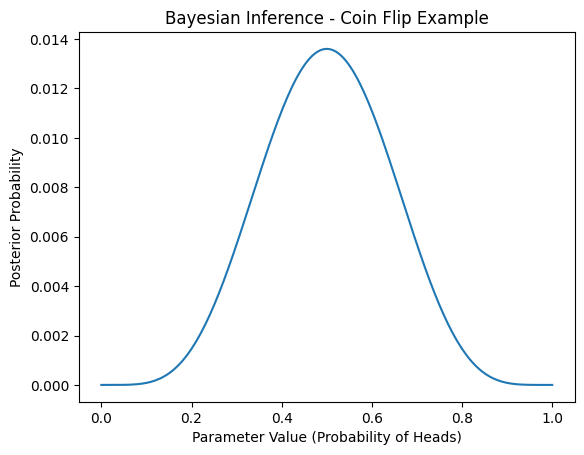

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bayesian_inference(prior, likelihood, data):
    """
    Performs Bayesian inference using Bayes' theorem.

    Args:
        prior: A function representing the prior distribution.  Takes a parameter value as input and returns the prior probability.
        likelihood: A function representing the likelihood function.  Takes a parameter value and data point as input and returns the likelihood.
        data: A list or numpy array of observed data.

    Returns:
        A tuple containing:
            - posterior: A numpy array representing the posterior distribution.
            - parameter_values: A numpy array of parameter values.
    """

    # Define the parameter space (range of possible parameter values)
    parameter_values = np.linspace(0, 1, 200)  # Example: parameters from 0 to 1

    # Calculate the prior probabilities for each parameter value
    prior_probs = np.array([prior(param) for param in parameter_values])

    # Calculate the likelihood for each parameter value and data point
    likelihoods = np.array([[likelihood(param, data_point) for data_point in data] for param in parameter_values])

    # Calculate the product of likelihoods for each parameter (evidence for that parameter value)
    likelihood_products = np.prod(likelihoods, axis=1)


    # Calculate the unnormalized posterior
    unnormalized_posterior = prior_probs * likelihood_products

    # Normalize the posterior
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior)

    return posterior, parameter_values


# Example usage:
# Simulate some data (coin flips)
np.random.seed(42)
data = np.random.binomial(1, 0.6, 10)  # 10 coin flips with a true probability of heads of 0.6

# Define prior distribution (uniform prior)
def prior(p):
    return 1.0  # Uniform prior (all parameter values equally likely)


# Define likelihood function (Bernoulli likelihood)
def likelihood(p, x):
    if x == 1:
        return p
    else:
        return 1-p

# Perform Bayesian inference
posterior, parameter_values = bayesian_inference(prior, likelihood, data)


# Plot results
plt.plot(parameter_values, posterior)
plt.xlabel("Parameter Value (Probability of Heads)")
plt.ylabel("Posterior Probability")
plt.title("Bayesian Inference - Coin Flip Example")
plt.show()



12. Perform a Chi-square test for independence between two categorical variables in Python.

In [ ]:
from scipy.stats import chi2_contingency

def chi_square_test(observed):
    """
    Performs a Chi-square test for independence.

    Args:
        observed: A contingency table (a 2D array or list of lists) representing the observed frequencies.

    Returns:
        A dictionary containing the chi-square statistic, p-value, degrees of freedom, and expected frequencies.
    """
    chi2, p, dof, expected = chi2_contingency(observed)
    return {
        "chi2_statistic": chi2,
        "p_value": p,
        "degrees_of_freedom": dof,
        "expected_frequencies": expected
    }

# Example usage:
observed_data = [[20, 15], [10, 25]]  # Example contingency table

results = chi_square_test(observed_data)
results

# Interpretation:
# Check the p-value. If p-value is less than your significance level (e.g. 0.05), reject the null hypothesis of independence.


{'chi2_statistic': 4.725,
 'p_value': 0.029727183306054526,
 'degrees_of_freedom': 1,
 'expected_frequencies': array([[15., 20.],
        [15., 20.]])}

13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.

In [ ]:
def calculate_expected_frequencies(observed):
    """
    Calculates the expected frequencies for a Chi-square test.

    Args:
      observed: A contingency table (list of lists or NumPy array) representing the observed frequencies.

    Returns:
      A NumPy array representing the expected frequencies.  Returns None if input is invalid.
    """
    try:
        import numpy as np
        observed = np.array(observed, dtype=float)  # Convert to NumPy array for calculations
        row_totals = observed.sum(axis=1, keepdims=True)
        col_totals = observed.sum(axis=0, keepdims=True)
        grand_total = observed.sum()
        expected = (row_totals * col_totals) / grand_total
        return expected
    except (ValueError, TypeError):
        print("Invalid input: observed data must be a 2D numerical array or list of lists.")
        return None

# Example usage
observed_data = [[20, 15], [10, 25]]
expected_freqs = calculate_expected_frequencies(observed_data)

if expected_freqs is not None:
    print("Expected Frequencies:")
expected_freqs


Expected Frequencies:


array([[15., 20.],
       [15., 20.]])

14. Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

In [ ]:
import numpy as np
from scipy.stats import chisquare

def goodness_of_fit(observed, expected):
    """
    Performs a Chi-square goodness-of-fit test.

    Args:
        observed: A list or numpy array of observed frequencies.
        expected: A list or numpy array of expected frequencies.

    Returns:
        A dictionary containing the chi-square statistic, p-value, and degrees of freedom.
    """
    chi2, p = chisquare(observed, expected)
    return {"chi2_statistic": chi2, "p_value": p}

# Example usage:
observed_frequencies = [10, 20, 15, 25]  # Example observed data
expected_frequencies = [15, 15, 15, 25]  # Example expected data

results = goodness_of_fit(observed_frequencies, expected_frequencies)
results


{'chi2_statistic': 3.3333333333333335, 'p_value': 0.3430301461382424}

15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

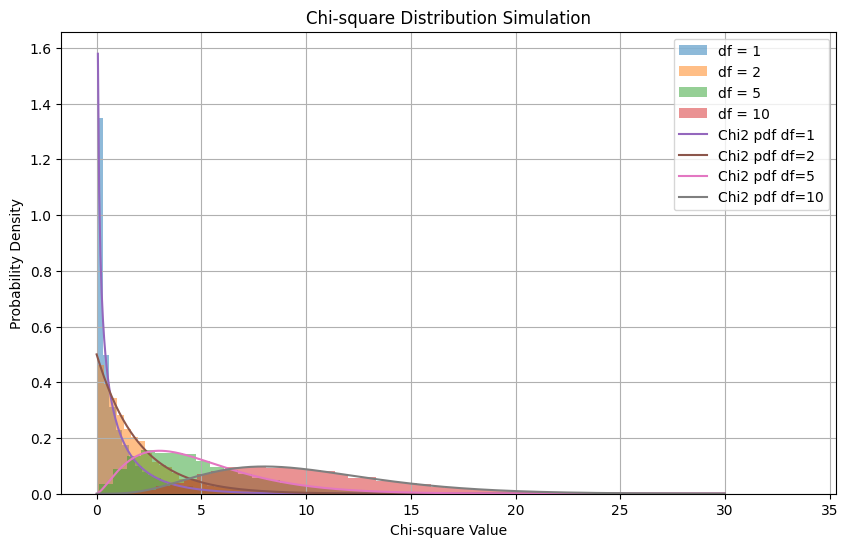

Characteristics of the Chi-square Distribution:
- It is a continuous probability distribution.
- It is defined for non-negative values.
- Its shape depends on the degrees of freedom (df).
- As the degrees of freedom increase, the distribution becomes more symmetrical and approaches a normal distribution.
- It is commonly used in hypothesis testing, especially for categorical data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

def simulate_and_visualize_chi2(df_values, n_samples=10000):
    """
    Simulates and visualizes the Chi-square distribution for different degrees of freedom.

    Args:
        df_values: A list of degrees of freedom values.
        n_samples: The number of random samples to generate for each degree of freedom.
    """

    plt.figure(figsize=(10, 6))

    for df in df_values:
        samples = chi2.rvs(df, size=n_samples)
        plt.hist(samples, bins=50, density=True, alpha=0.5, label=f'df = {df}')

    x = np.linspace(0, max(df_values) * 3, 500)  # Adjust range as needed
    for df in df_values:
        plt.plot(x, chi2.pdf(x, df), label=f'Chi2 pdf df={df}')


    plt.xlabel('Chi-square Value')
    plt.ylabel('Probability Density')
    plt.title('Chi-square Distribution Simulation')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Discussion of characteristics:
    print("Characteristics of the Chi-square Distribution:")
    print("- It is a continuous probability distribution.")
    print("- It is defined for non-negative values.")
    print("- Its shape depends on the degrees of freedom (df).")
    print("- As the degrees of freedom increase, the distribution becomes more symmetrical and approaches a normal distribution.")
    print("- It is commonly used in hypothesis testing, especially for categorical data.")

# Example usage
simulate_and_visualize_chi2([1, 2, 5, 10])


16. Implement an F-test using Python to compare the variances of two random samples.

In [ ]:
from scipy.stats import f

def f_test(sample1, sample2):
    """
    Performs an F-test to compare the variances of two samples.

    Args:
      sample1: A list or numpy array representing the first sample.
      sample2: A list or numpy array representing the second sample.

    Returns:
      A dictionary containing the F-statistic, p-value, and degrees of freedom.
    """
    var1 = np.var(sample1, ddof=1)  # Sample variance
    var2 = np.var(sample2, ddof=1)
    f_statistic = var1 / var2  # Calculate the F-statistic
    df1 = len(sample1) - 1  # Degrees of freedom for sample 1
    df2 = len(sample2) - 1

    # Calculate the p-value
    p_value = 2 * min(f.cdf(f_statistic, df1, df2), 1 - f.cdf(f_statistic, df1, df2))

    return {
        "f_statistic": f_statistic,
        "p_value": p_value,
        "df1": df1,
        "df2": df2,
    }

# Example Usage
sample1 = [10, 12, 15, 11, 13]
sample2 = [8, 9, 10, 7, 11]

results = f_test(sample1, sample2)
results


{'f_statistic': 1.48, 'p_value': 0.7133026753046221, 'df1': 4, 'df2': 4}

17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.

In [ ]:
from scipy.stats import f_oneway

def anova_test(groups):
    """
    Performs an ANOVA test to compare means between multiple groups.

    Args:
      groups: A list of lists or numpy arrays, where each inner list represents a group of data.

    Returns:
        A dictionary containing the F-statistic, p-value, and interpretation of the results.
    """
    f_statistic, p_value = f_oneway(*groups)  # Use * to unpack the list of groups

    alpha = 0.05  # Significance level

    if p_value < alpha:
        interpretation = (
            "Reject the null hypothesis. There is a statistically significant difference "
            "in means between at least two of the groups."
        )
    else:
        interpretation = (
            "Fail to reject the null hypothesis. There is no statistically significant "
            "difference in means between the groups."
        )

    return {
        "f_statistic": f_statistic,
        "p_value": p_value,
        "interpretation": interpretation,
    }

# Example usage
group1 = [10, 12, 15, 11, 13]
group2 = [8, 9, 10, 7, 11]
group3 = [14, 16, 13, 15, 17]

results = anova_test([group1, group2, group3])
results


{'f_statistic': 15.540229885057466,
 'p_value': 0.0004670953014469075,
 'interpretation': 'Reject the null hypothesis. There is a statistically significant difference in means between at least two of the groups.'}

18.  Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.

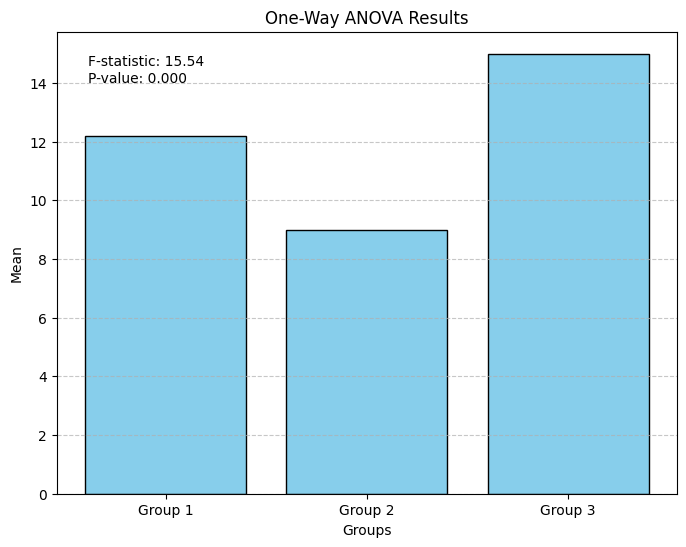

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

def oneway_anova_with_plot(groups):
    """
    Performs a one-way ANOVA test and visualizes the group means.

    Args:
        groups: A list of lists or numpy arrays, where each inner list represents a group.
    """
    f_statistic, p_value = f_oneway(*groups)

    # Plotting
    group_labels = [f"Group {i+1}" for i in range(len(groups))]
    group_means = [np.mean(group) for group in groups]

    plt.figure(figsize=(8, 6))
    plt.bar(group_labels, group_means, color='skyblue', edgecolor='black')
    plt.xlabel("Groups")
    plt.ylabel("Mean")
    plt.title("One-Way ANOVA Results")
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    plt.text(0.05, 0.95, f"F-statistic: {f_statistic:.2f}\nP-value: {p_value:.3f}",
             horizontalalignment='left', verticalalignment='top',
             transform=plt.gca().transAxes)

    plt.show()


# Example usage
group1 = [10, 12, 15, 11, 13]
group2 = [8, 9, 10, 7, 11]
group3 = [14, 16, 13, 15, 17]

oneway_anova_with_plot([group1, group2, group3])


19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.

In [ ]:
from scipy.stats import shapiro, levene

def check_anova_assumptions(groups):
    """
    Checks the assumptions for ANOVA: normality, independence, and equal variance.

    Args:
        groups: A list of lists or numpy arrays, where each inner list represents a group of data.

    Returns:
        A dictionary containing the results of the assumption checks.
    """
    results = {}

    # Normality assumption
    for i, group in enumerate(groups):
        statistic, p_value = shapiro(group)
        results[f"Group {i+1} Normality"] = {
            "statistic": statistic,
            "p-value": p_value,
            "interpretation": "Normally distributed" if p_value > 0.05 else "Not normally distributed",
        }

    # Equal variance assumption
    statistic, p_value = levene(*groups)  # Levene test for equal variances
    results["Equal Variance"] = {
        "statistic": statistic,
        "p-value": p_value,
        "interpretation": "Equal variances" if p_value > 0.05 else "Unequal variances",
    }

    # Independence assumption (usually checked based on the experimental design):
    # This is not a statistical test but an important consideration.
    results["Independence"] = "Check your experimental design"  # Placeholder - user must consider design


    return results

# Example usage
group1 = [10, 12, 15, 11, 13]
group2 = [8, 9, 10, 7, 11]
group3 = [14, 16, 13, 15, 17]

assumption_results = check_anova_assumptions([group1, group2, group3])
assumption_results


{'Group 1 Normality': {'statistic': 0.9787161500642191,
  'p-value': 0.9276364233495382,
  'interpretation': 'Normally distributed'},
 'Group 2 Normality': {'statistic': 0.986762155211559,
  'p-value': 0.9671739349728582,
  'interpretation': 'Normally distributed'},
 'Group 3 Normality': {'statistic': 0.986762155211559,
  'p-value': 0.9671739349728582,
  'interpretation': 'Normally distributed'},
 'Equal Variance': {'statistic': 0.07407407407407401,
  'p-value': 0.9290241400232093,
  'interpretation': 'Equal variances'},
 'Independence': 'Check your experimental design'}

20. Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results.

In [ ]:
# prompt: Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results.

import statsmodels.formula.api as sm
import pandas as pd
import matplotlib.pyplot as plt

def two_way_anova(data, formula):
    """
    Performs a two-way ANOVA test and visualizes the results.

    Args:
        data: A pandas DataFrame containing the data.
        formula: The formula for the ANOVA model (e.g., 'dependent_variable ~ factor1 * factor2').

    Returns:
        The ANOVA table as a pandas DataFrame and displays the interaction plot.
    """

    model = sm.ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  #Type 2 ANOVA
    print(anova_table)

    # Interaction plot
    import seaborn as sns
    sns.pointplot(x="factor1", y="dependent_variable", hue="factor2", data=data, ci=None)
    plt.show()

    return anova_table

# Example usage:
# Create sample data (replace with your actual data)
data = {
    'dependent_variable': [10, 12, 15, 11, 13, 8, 9, 10, 7, 11, 14, 16, 13, 15, 17, 10, 12, 15, 11, 13],
    'factor1': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
    'factor2': ['X', 'X', 'X', 'Y', 'Y', 'Y', 'X', 'X', 'X', 'Y','X', 'X', 'X', 'Y', 'Y', 'Y', 'X', 'X', 'X', 'Y']
}
df = pd.DataFrame(data)


# Replace 'dependent_variable', 'factor1', and 'factor2' with your column names
formula = 'dependent_variable ~ factor1 * factor2'
anova_results = two_way_anova(df, formula)


AttributeError: module 'statsmodels.formula.api' has no attribute 'stats'

21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.

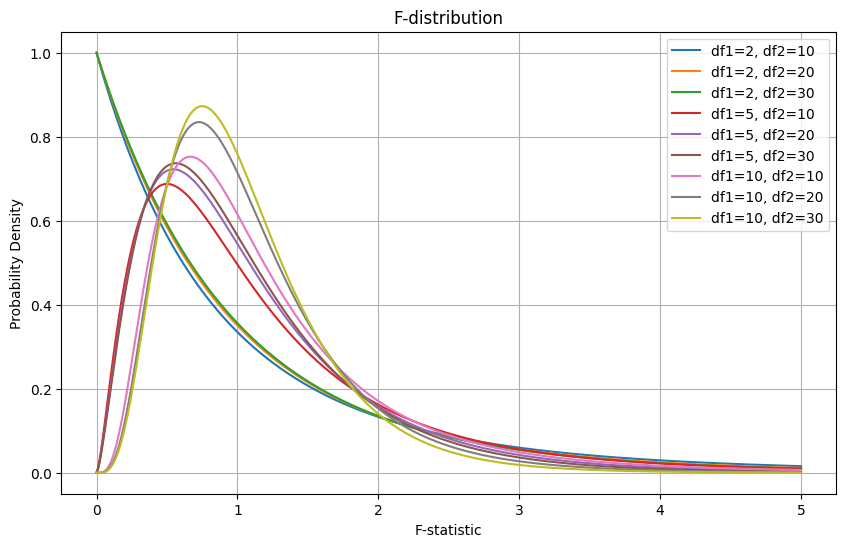

Use in Hypothesis Testing:
The F-distribution is primarily used in hypothesis tests where we compare variances or means of multiple groups.
1. Comparing Variances (F-test): The F-test checks if the variances of two populations are equal.
2. ANOVA: Analysis of Variance uses the F-distribution to test if there is a significant difference in means across three or more groups.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def visualize_f_distribution(df1_values, df2_values, x_range=(0, 5)):
    """
    Visualizes the F-distribution for different degrees of freedom.

    Args:
      df1_values: A list of numerator degrees of freedom values.
      df2_values: A list of denominator degrees of freedom values.
      x_range: A tuple specifying the x-axis range for the plot.
    """
    x = np.linspace(x_range[0], x_range[1], 500)

    plt.figure(figsize=(10, 6))

    for df1 in df1_values:
        for df2 in df2_values:
            plt.plot(x, f.pdf(x, df1, df2), label=f'df1={df1}, df2={df2}')

    plt.xlabel('F-statistic')
    plt.ylabel('Probability Density')
    plt.title('F-distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Use in Hypothesis Testing:")
    print("The F-distribution is primarily used in hypothesis tests where we compare variances or means of multiple groups.")
    print("1. Comparing Variances (F-test): The F-test checks if the variances of two populations are equal.")
    print("2. ANOVA: Analysis of Variance uses the F-distribution to test if there is a significant difference in means across three or more groups.")


# Example usage:
visualize_f_distribution(df1_values=[2, 5, 10], df2_values=[10, 20, 30])


22. Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.

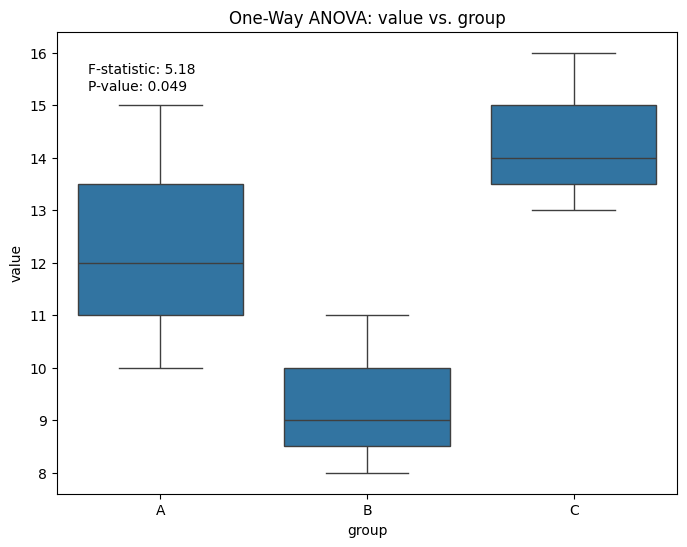

F-statistic: 5.18
P-value: 0.049


In [ ]:
# prompt: Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.

import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

def oneway_anova_with_boxplot(data, dependent_variable, group_variable):
    """
    Performs a one-way ANOVA test and creates boxplots to compare group means.

    Args:
        data: A pandas DataFrame containing the data.
        dependent_variable: The name of the column representing the dependent variable.
        group_variable: The name of the column representing the grouping variable.
    """

    # Perform one-way ANOVA
    groups = [data[dependent_variable][data[group_variable] == group] for group in data[group_variable].unique()]
    f_statistic, p_value = f_oneway(*groups)

    # Create boxplots
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=group_variable, y=dependent_variable, data=data)
    plt.title(f"One-Way ANOVA: {dependent_variable} vs. {group_variable}")
    plt.xlabel(group_variable)
    plt.ylabel(dependent_variable)

    # Add ANOVA results to the plot
    plt.text(0.05, 0.9, f"F-statistic: {f_statistic:.2f}\nP-value: {p_value:.3f}",
             horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

    plt.show()

    # Print ANOVA results
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.3f}")


# Example usage (replace with your actual data):
# Sample data (replace with your DataFrame)
data = {'group': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
        'value': [10, 12, 15, 8, 9, 11, 14, 16, 13]}
df = pd.DataFrame(data)

oneway_anova_with_boxplot(df, 'value', 'group')


23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.

T-statistic: 0.889701920750517
P-value: 0.37730145339434673
Fail to reject the null hypothesis: There is no significant difference in means between the groups.


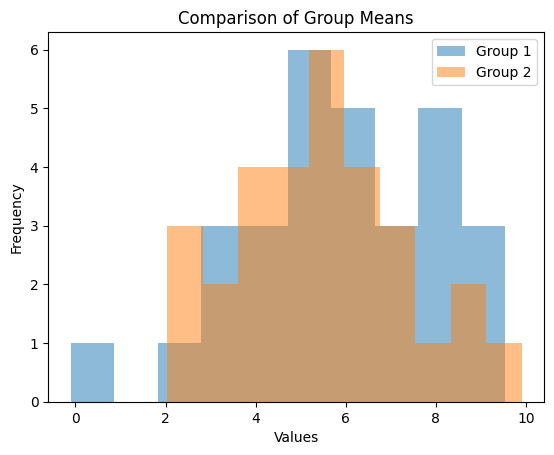

In [ ]:
# Simulate two groups of data from normal distributions
np.random.seed(0)  # for reproducibility
group1 = np.random.normal(loc=5, scale=2, size=30)
group2 = np.random.normal(loc=6, scale=2, size=30)

# Perform an independent samples t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in means between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in means between the groups.")

# Visualization (optional)
plt.hist(group1, alpha=0.5, label='Group 1')
plt.hist(group2, alpha=0.5, label='Group 2')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Comparison of Group Means')
plt.show()


24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.

In [ ]:
import numpy as np
from scipy.stats import chi2

def hypothesis_test_variance(sample, population_variance, alpha=0.05):
    """
    Performs a hypothesis test for population variance using a Chi-square distribution.

    Args:
        sample: A NumPy array or list representing the sample data.
        population_variance: The hypothesized population variance.
        alpha: The significance level (default is 0.05).

    Returns:
        A dictionary containing the test statistic, p-value, and conclusion.
    """

    n = len(sample)
    sample_variance = np.var(sample, ddof=1)  # Use ddof=1 for sample variance
    test_statistic = (n - 1) * sample_variance / population_variance
    p_value = 2 * min(chi2.cdf(test_statistic, n - 1), 1 - chi2.cdf(test_statistic, n - 1)) #two tailed test

    conclusion = (
        "Reject the null hypothesis" if p_value < alpha else "Fail to reject the null hypothesis"
    )

    return {
        "test_statistic": test_statistic,
        "p_value": p_value,
        "conclusion": conclusion,
    }


# Example usage:
sample_data = [12, 15, 18, 20, 22, 19, 25, 21, 17, 16]
population_variance_hypothesis = 10  # Example hypothesized population variance
alpha = 0.05

results = hypothesis_test_variance(sample_data, population_variance_hypothesis, alpha)
results


{'test_statistic': 12.65,
 'p_value': 0.3581866565577123,
 'conclusion': 'Fail to reject the null hypothesis'}

25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.

In [ ]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

def z_test_proportions(count1, nobs1, count2, nobs2):
    """
    Performs a Z-test for comparing proportions between two groups.

    Args:
        count1: Number of successes in group 1.
        nobs1: Total number of observations in group 1.
        count2: Number of successes in group 2.
        nobs2: Total number of observations in group 2.

    Returns:
        A tuple containing the Z-statistic and the p-value.
    """
    z_stat, p_value = proportions_ztest([count1, count2], [nobs1, nobs2])
    return z_stat, p_value


# Example usage
count1 = 15  # Number of successes in group 1
nobs1 = 50   # Total observations in group 1
count2 = 20  # Number of successes in group 2
nobs2 = 60   # Total observations in group 2

z_stat, p_value = z_test_proportions(count1, nobs1, count2, nobs2)
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

#Interpretation:
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis: There is a significant difference in proportions between the groups.")
else:
  print("Fail to reject the null hypothesis: There is no significant difference in proportions between the groups.")


Z-statistic: -0.374
P-value: 0.709
Fail to reject the null hypothesis: There is no significant difference in proportions between the groups.


26.  Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.

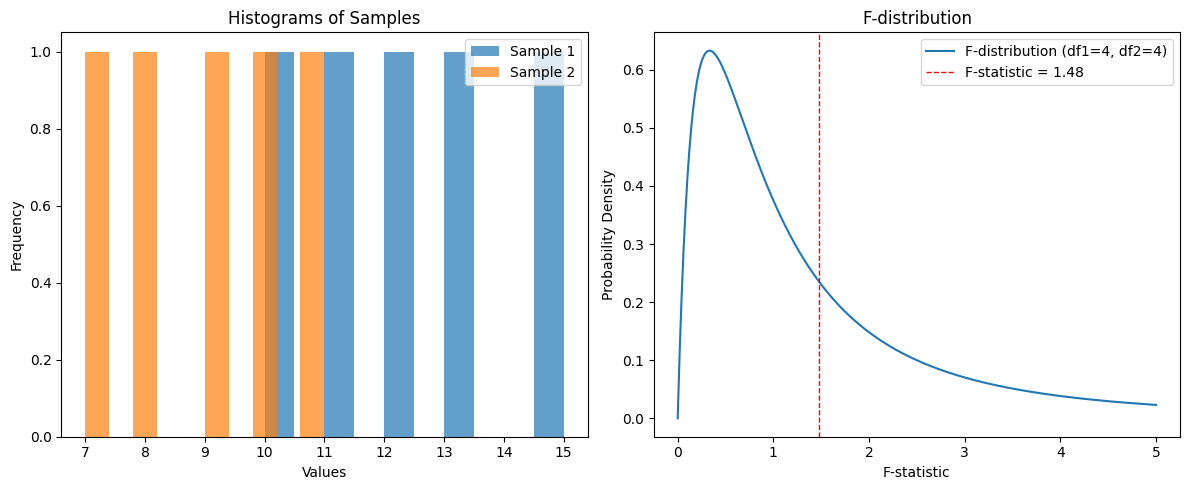

{'f_statistic': 1.48,
 'p_value': 0.7133026753046221,
 'df1': 4,
 'df2': 4,
 'interpretation': 'Fail to reject the null hypothesis: Variances are not significantly different.'}

In [ ]:
def f_test_with_visualization(sample1, sample2, alpha=0.05):
    """
    Performs an F-test and visualizes the results.

    Args:
        sample1: First dataset.
        sample2: Second dataset.
        alpha: Significance level.

    Returns:
        A dictionary containing test results and displays visualizations.
    """

    results = f_test(sample1, sample2)  # Assuming f_test function from previous code

    # Interpret the results
    if results["p_value"] < alpha:
        interpretation = "Reject the null hypothesis: Variances are significantly different."
    else:
        interpretation = "Fail to reject the null hypothesis: Variances are not significantly different."
    results["interpretation"] = interpretation

    # Visualize the data and the F-distribution
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(sample1, alpha=0.7, label="Sample 1")
    plt.hist(sample2, alpha=0.7, label="Sample 2")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("Histograms of Samples")
    plt.legend()


    plt.subplot(1, 2, 2)
    x = np.linspace(0, max(results['f_statistic'] * 2, 5), 500) #define a range for x-axis
    plt.plot(x, f.pdf(x, results["df1"], results["df2"]), label=f"F-distribution (df1={results['df1']}, df2={results['df2']})")
    plt.axvline(results["f_statistic"], color='red', linestyle='dashed', linewidth=1, label=f"F-statistic = {results['f_statistic']:.2f}")
    plt.xlabel("F-statistic")
    plt.ylabel("Probability Density")
    plt.title("F-distribution")
    plt.legend()

    plt.tight_layout()
    plt.show()
    return results

#Example usage
sample1 = [10,12,15,11,13]
sample2 = [8,9,10,7,11]

f_test_results = f_test_with_visualization(sample1, sample2)
f_test_results


27.  Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

In [ ]:
import numpy as np
from scipy.stats import chisquare

def chi_square_goodness_of_fit(observed_frequencies, expected_frequencies):
    """
    Performs a Chi-square goodness-of-fit test.

    Args:
        observed_frequencies: A list or numpy array of observed frequencies.
        expected_frequencies: A list or numpy array of expected frequencies.

    Returns:
        A dictionary containing the Chi-square statistic, p-value, and degrees of freedom.
    """

    chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)
    degrees_of_freedom = len(observed_frequencies) - 1  # Degrees of freedom

    return {
        "chi2_statistic": chi2_stat,
        "p_value": p_value,
        "degrees_of_freedom": degrees_of_freedom
    }


# Example usage: Simulate data
np.random.seed(42)  # for reproducibility
observed = np.random.randint(0, 100, size=6) # Simulate observed frequencies (adjust size as needed)
total_observed = np.sum(observed)
expected = np.array([total_observed/6] * 6) # Simulate expected frequencies (uniform distribution)


results = chi_square_goodness_of_fit(observed, expected)
print(results)

# Interpretation
alpha = 0.05
if results["p_value"] < alpha:
    print("Reject the null hypothesis: The observed frequencies significantly deviate from the expected frequencies.")
else:
    print("Fail to reject the null hypothesis: The observed frequencies do not significantly deviate from the expected frequencies.")


{'chi2_statistic': 87.49350649350649, 'p_value': 2.2574248615457192e-17, 'degrees_of_freedom': 5}
Reject the null hypothesis: The observed frequencies significantly deviate from the expected frequencies.
